In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/.../all_comments_with_labels.csv", lineterminator='\n')

In [ ]:
df.head()

,publishedAt,updatedAt,likeCount,textDisplay,commentId,is_reply,video_index,year,predicted_class
0,2024-04-08 22:42:29+00:00,2024-04-08T22:42:29Z,0,You work for 40yrs to have $1m in your retirem...,UgzESjqo25TXjexjOFZ4AaABAg,False,1,2024,0
1,2024-04-08 18:19:43+00:00,2024-04-08T18:19:43Z,0,Your problem is a lack of moral authority lead...,Ugwrl0fluYJ6VCOCSNJ4AaABAg,False,1,2024,0
2,2024-04-08 14:30:50+00:00,2024-04-08T14:30:50Z,0,"Hiiii, Im here to point out some things that I...",UgxWKI7cfFNokk4QyjZ4AaABAg,False,1,2024,1
3,2024-04-07 22:33:47+00:00,2024-04-07T22:33:47Z,0,poclie fro 110k a year and navy for 80 k year...,Ugx6r3DykzQ8sF9CSNp4AaABAg,False,1,2024,0
4,2024-04-07 22:33:31+00:00,2024-04-07T22:33:31Z,0,poclie fro 110k a year and navy for 80 k year...,UgzcuKoxbRUuXRFFQD54AaABAg,False,1,2024,0


In [ ]:
df['is_L'] = (df['predicted_class'] == 2).astype(int)

In [ ]:
grouped = df.groupby('video_index')['is_L'].mean().reset_index()
grouped.rename(columns={'is_L': 'L_proportion'}, inplace=True)

In this step, I created a new dataFrame from comments dataset for combine with the video dataset.

In [ ]:
print(grouped)

     video_index  L_proportion
0              1      0.129118
1              2      0.213938
2              3      0.137708
3              4      0.153110
4              5      0.053414
..           ...           ...
240          263      0.225806
241          267      0.027778
242          268      0.053398
243          272      0.044444
244          274      0.132530

[245 rows x 2 columns]


In [ ]:
df = pd.read_csv("/.../videos_index_edited.csv")

In [ ]:
df.head()

,title,video_id,description,comment_count,view_count,published_at,channel_subscriber_count,subtitles_text,cleaned_subtitles,Relevance
0,Is inequality inevitable?,rEnf_CFoyv0,Explore how economic inequality can be measure...,2246,995686.0,2022-10-11T15:01:01Z,19800000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,"In South Africa, one of the most unequal count...",NaN
1,How Wealth Inequality Spiraled Out of Control ...,wOI8RuhW7q0,Here it is: The full story of wealth inequalit...,5955,973519.0,2021-11-03T19:01:04Z,630000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Elon Musk's wealth has surpassed $200 billion....,NaN
2,Wealth Gap: Last Week Tonight with John Oliver...,LfgSEwjAeno,John Oliver discusses America's growing wealth...,8656,17937666.0,2014-07-14T06:30:01Z,9440000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Our main story tonight is income inequality. A...,NaN
3,A Look At Income Inequality In The United Stat...,qc7g6Uhi1i4,Income inequality has always existed in the U....,209,130275.0,2020-02-20T21:22:33Z,1330000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Income inequality has always existed in the US...,NaN
4,Thomas Sowell on the Myths of Economic Inequality,mS5WYp5xmvI,"Recorded on November 15, 2018 Thomas Sowell di...",2153,7832958.0,2018-12-03T15:57:22Z,902000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,- It happens to me all the time and it happene...,NaN


In [ ]:
df.index = pd.RangeIndex(start=1, stop=len(df) + 1, step=1)

In [ ]:
df.index.name = 'video_index'

In [ ]:
df = df[df['Relevance'] != 'No']

In [ ]:
df1 = pd.merge(df, grouped, on='video_index', how='inner')

In [ ]:
df1.head()

,video_index,title,video_id,description,comment_count,view_count,published_at,channel_subscriber_count,subtitles_text,cleaned_subtitles,Relevance,L_proportion
0,1,Is inequality inevitable?,rEnf_CFoyv0,Explore how economic inequality can be measure...,2246,995686.0,2022-10-11T15:01:01Z,19800000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,"In South Africa, one of the most unequal count...",NaN,0.129118
1,2,How Wealth Inequality Spiraled Out of Control ...,wOI8RuhW7q0,Here it is: The full story of wealth inequalit...,5955,973519.0,2021-11-03T19:01:04Z,630000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Elon Musk's wealth has surpassed $200 billion....,NaN,0.213938
2,3,Wealth Gap: Last Week Tonight with John Oliver...,LfgSEwjAeno,John Oliver discusses America's growing wealth...,8656,17937666.0,2014-07-14T06:30:01Z,9440000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Our main story tonight is income inequality. A...,NaN,0.137708
3,4,A Look At Income Inequality In The United Stat...,qc7g6Uhi1i4,Income inequality has always existed in the U....,209,130275.0,2020-02-20T21:22:33Z,1330000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Income inequality has always existed in the US...,NaN,0.153110
4,5,Thomas Sowell on the Myths of Economic Inequality,mS5WYp5xmvI,"Recorded on November 15, 2018 Thomas Sowell di...",2153,7832958.0,2018-12-03T15:57:22Z,902000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,- It happens to me all the time and it happene...,NaN,0.053414


<ipython-input-26-f856f4ad5a54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(y='L_proportion', data=df1,


Text(0, 0.5, 'L Proportion')

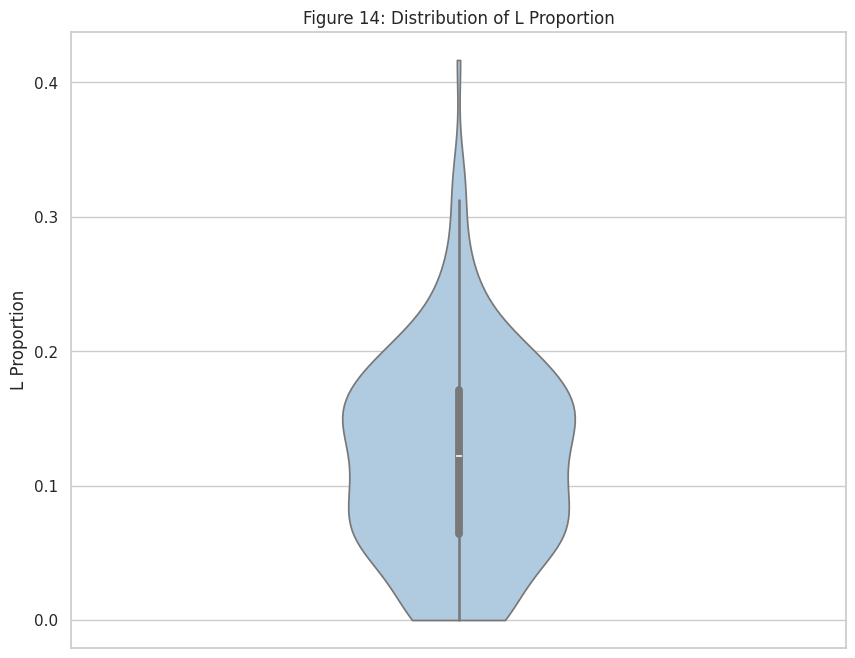

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.violinplot(y='L_proportion', data=df1,
                 palette=['#A8CAE8'], width = 0.3, cut = 0)
plt.title('Figure 14: Distribution of L Proportion')
plt.ylabel('L Proportion')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Download Model
tokenizer = AutoTokenizer.from_pretrained("manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2023-1-1")
model = AutoModelForSequenceClassification.from_pretrained("manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2023-1-1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

In [ ]:
df1 = df1[df1['cleaned_subtitles'].notna()]

In [ ]:
# Define a function
def predict_topic_with_prob(sentence):
    inputs = tokenizer(sentence,
                       return_tensors="pt",
                       max_length=200,
                       padding="max_length",
                       truncation=True)
    logits = model(**inputs).logits
    probabilities = torch.softmax(logits, dim=1).tolist()[0]
    probabilities = {model.config.id2label[index]: round(probability * 100, 2) for index, probability in enumerate(probabilities)}
    probabilities = dict(sorted(probabilities.items(), key=lambda item: item[1], reverse=True))
    return probabilities

# Apply new rows
df1['predicted_score'] = df1['cleaned_subtitles'].apply(predict_topic_with_prob)

# Show results
print(df1[['cleaned_subtitles', 'predicted_score']].head())

                                   cleaned_subtitles  \
0  In South Africa, one of the most unequal count...   
1  Elon Musk's wealth has surpassed $200 billion....   
2  Our main story tonight is income inequality. A...   
3  Income inequality has always existed in the US...   
4  - It happens to me all the time and it happene...   

                                     predicted_score  
0  {'503 - Equality: Positive': 97.83, '415 - Mar...  
1  {'503 - Equality: Positive': 78.33, '403 - Mar...  
2  {'503 - Equality: Positive': 94.31, '305 - Pol...  
3  {'503 - Equality: Positive': 87.89, '305 - Pol...  
4  {'305 - Political Authority': 75.74, '601 - Na...  


<ipython-input-18-77f4e78729ec>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted_score'] = df1['cleaned_subtitles'].apply(predict_topic_with_prob)


In [ ]:
# Define a function
def predict_topic(sentence):
    inputs = tokenizer(sentence,
                       return_tensors="pt",
                       max_length=200,
                       padding="max_length",
                       truncation=True)
    logits = model(**inputs).logits
    predicted_class_index = logits.argmax().item()
    predicted_class = model.config.id2label[predicted_class_index]
    return predicted_class

# Only topic with highest score
df1['predicted_topic'] = df1['cleaned_subtitles'].apply(predict_topic)

<ipython-input-27-3c74f1af743a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted_topic'] = df1['cleaned_subtitles'].apply(predict_topic)


In [ ]:
#Transfer time
df1['published_at'] = pd.to_datetime(df1['published_at'])
df1['year'] = df1['published_at'].dt.strftime('%Y')

In [ ]:
df1['predicted_score'] = df1['predicted_score'].apply(lambda x: x.get('503 - Equality: Positive', 'N/A'))

<ipython-input-20-fd029de15032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted_score'] = df1['predicted_score'].apply(lambda x: x.get('503 - Equality: Positive', 'N/A'))


In [ ]:
df1.head()

,video_index,title,video_id,description,comment_count,view_count,published_at,channel_subscriber_count,subtitles_text,cleaned_subtitles,Relevance,L_proportion,predicted_score,predicted_topic,year
0,1,Is inequality inevitable?,rEnf_CFoyv0,Explore how economic inequality can be measure...,2246,995686.0,2022-10-11 15:01:01+00:00,19800000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,"In South Africa, one of the most unequal count...",NaN,0.129118,97.83,503 - Equality: Positive,2022
1,2,How Wealth Inequality Spiraled Out of Control ...,wOI8RuhW7q0,Here it is: The full story of wealth inequalit...,5955,973519.0,2021-11-03 19:01:04+00:00,630000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Elon Musk's wealth has surpassed $200 billion....,NaN,0.213938,78.33,503 - Equality: Positive,2021
2,3,Wealth Gap: Last Week Tonight with John Oliver...,LfgSEwjAeno,John Oliver discusses America's growing wealth...,8656,17937666.0,2014-07-14 06:30:01+00:00,9440000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Our main story tonight is income inequality. A...,NaN,0.137708,94.31,503 - Equality: Positive,2014
3,4,A Look At Income Inequality In The United Stat...,qc7g6Uhi1i4,Income inequality has always existed in the U....,209,130275.0,2020-02-20 21:22:33+00:00,1330000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,Income inequality has always existed in the US...,NaN,0.153110,87.89,503 - Equality: Positive,2020
4,5,Thomas Sowell on the Myths of Economic Inequality,mS5WYp5xmvI,"Recorded on November 15, 2018 Thomas Sowell di...",2153,7832958.0,2018-12-03 15:57:22+00:00,902000,WEBVTT\nKind: captions\nLanguage: en\n\n00:00:...,- It happens to me all the time and it happene...,NaN,0.053414,4.55,305 - Political Authority,2018


<ipython-input-25-df996134d854>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(y='predicted_score', data=df1,


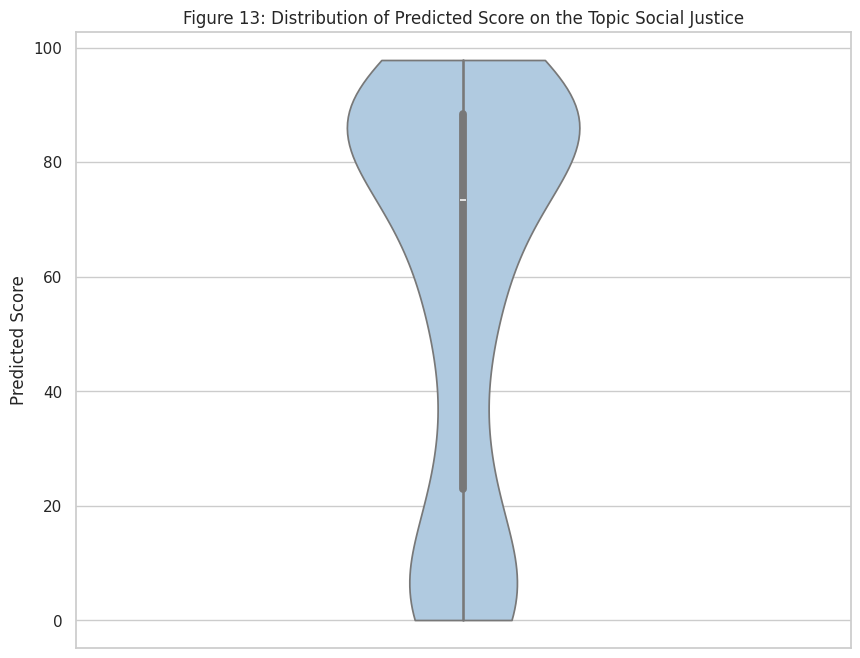

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

ax = sns.violinplot(y='predicted_score', data=df1,
                 palette=['#A8CAE8'], width = 0.3, cut = 0)

plt.title('Figure 13: Distribution of Predicted Score on the Topic Social Justice')
plt.ylabel('Predicted Score')
plt.show()

In [ ]:
file_path = '/.../Videos_index_forR.csv'
df1.to_csv(file_path, index=False)